# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Melya Vebryanti
- **Email:** melyavebryanti09@gmail.com
- **ID Dicoding:** melya_vebryanti

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana performa penyewaan Sepeda dalam setiap bulannya?
- Pertanyaan 2: Pada jam berapa paling banyak dan paling sedikit sepeda disewa?
- Pertanyaan 3: Bagaimana perbandingan casual dan registered?
- Pertanyaan 4: Bagaimana hubungan temperature, feeling temperature, humidity, dan windspeed dengan penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\melya\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://drive.google.com/uc?id=1o39HB0r9m7RoLHKUfhzCeCvY-p4KjTQx")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv("https://drive.google.com/uc?id=1zRNJVwhXFzjFYNhcRPzCgvjTfMzjC40n")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Table `day_df` consists 731 rows and 16 columns, it's mean have 730 data
- Table `hour_df` consists 17379 rows and 17 columns, it's mean have 17378 data

### Assessing Data

#### Table `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# check missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# check duplicate data
print('Number of duplications:', day_df.duplicated().sum())

Number of duplications: 0


In [7]:
# statistic descriptive
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Table `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# check missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# check duplicate data
print('Number of duplications:', hour_df.duplicated().sum())

Number of duplications: 0


In [11]:
# statistic descriptive
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Table `day_df` and `hour_df` haven't missing value and duplicate data
- Based on result statistic descriptive and read from attribute information dataset, we know that some variables have categorical values and normalized values

### Cleaning Data

What wil I do at cleaning data session:
- change coumns name (for easy to read)
- change data type
- change content (returns to original value before categorization)
- returns to original value before normalization

#### Change Columns Name

In [12]:
# show columns name
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
day_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weekday': 'day', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
hour_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weekday': 'day', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)

In [14]:
# check
print(day_df.columns)
print(hour_df.columns)

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'day',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')
Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday', 'day',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')


Based on the results, we successed change columns name.

#### Change Data Type

In [15]:
# object to datetime
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [16]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   day         731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

Successed change data type column `date` to datetime.

#### Change Content
Based on attribute information dataset.

In [17]:
# column season (1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter')

day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [18]:
# column year (0: 2011, 1: 2012)
day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})

In [19]:
# column month 
day_df['month'] = day_df['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
hour_df['month'] = hour_df['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [20]:
# column weekday (0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday')
day_df['day'] = day_df['day'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['day'] = hour_df['day'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [21]:
# column weathersit (1: 'Clear', 2: 'Mist', 3: 'Light snow', 4: 'Heavy rain')
day_df['weathersit'] = day_df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light snow', 4: 'Heavy rain'})
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light snow', 4: 'Heavy rain'})

#### Returns Value Before Normalizing

In [22]:
# column humidity 
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

# column temp
day_df['temp'] = day_df['temp']*41
hour_df['temp'] = hour_df['temp']*41

# column atemp
day_df['atemp'] = day_df['atemp']*50
hour_df['atemp'] = hour_df['atemp']*50

# column windspeed 
day_df['atemp'] = day_df['atemp']*67
hour_df['atemp'] = hour_df['atemp']*67

In [23]:
# check
print(day_df.head(3))
print(hour_df.head(3))

   instant       date  season  year    month  holiday       day  workingday  \
0        1 2011-01-01  Spring  2011  January        0  Saturday           0   
1        2 2011-01-02  Spring  2011  January        0    Sunday           0   
2        3 2011-01-03  Spring  2011  January        0    Monday           1   

  weathersit       temp       atemp  humidity  windspeed  casual  registered  \
0       Mist  14.110847  1218.14375   80.5833   0.160446     331         654   
1       Mist  14.902598  1185.02565   69.6087   0.248539     131         670   
2      Clear   8.050924   634.50675   43.7273   0.248309     120        1229   

   count  
0    985  
1    801  
2   1349  
   instant       date  season  year    month  hour  holiday       day  \
0        1 2011-01-01  Spring  2011  January     0        0  Saturday   
1        2 2011-01-01  Spring  2011  January     1        0  Saturday   
2        3 2011-01-01  Spring  2011  January     2        0  Saturday   

   workingday weathersit 

In [24]:
# save cleaned data
day_df.to_csv("cleaned_bikesharing_day.csv", index=False)
hour_df.to_csv("cleaned_bikesharing_hour.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [25]:
day_df.sample(5)

,instant,date,season,year,month,holiday,day,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
267,268,2011-09-25,Winter,2011,September,0,Sunday,0,Mist,26.000847,1918.33395,84.5000,0.050379,1544,3466,5010
303,304,2011-10-31,Winter,2011,October,0,Monday,1,Clear,13.940000,1192.81105,70.3333,0.106350,362,3307,3669
615,616,2012-09-07,Fall,2012,September,0,Friday,1,Clear,28.836653,2201.63340,73.6250,0.171646,1045,6459,7504
218,219,2011-08-07,Fall,2011,August,0,Sunday,0,Clear,30.442500,2396.22820,75.2917,0.201487,1298,2487,3785
689,690,2012-11-20,Winter,2012,November,0,Tuesday,1,Mist,15.340847,1275.23445,68.5000,0.082725,534,5100,5634


In [26]:
day_df.describe(include='all')

,instant,date,season,year,month,holiday,day,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,20.310776,1589.085862,62.789406,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,2.424346,264.883160,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,13.820424,1131.772375,52.000000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,20.431653,1630.555550,62.666700,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,26.872076,2038.816700,73.020850,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,35.328347,2817.001600,97.250000,0.507463,3410.000000,6946.000000,8714.000000


In [27]:
day_df.instant.is_unique

True

This means that each value in the `instant` column (record_index) is unique, with no duplicate values.

In [28]:
day_df.groupby(by='season').agg({
    'count': ['sum']
})

,count
,sum
season,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


It means, based on season the highest bike sharing is **fall season** followed by **summer season** and **winter season**, then the lowest is **spring season**.

In [29]:
day_df.groupby(by='day').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
            max   min         mean     sum
day                                       
Friday     8362  1167  4690.288462  487790
Monday     7525    22  4338.123810  455503
Saturday   8714   627  4550.542857  477807
Sunday     8227   605  4228.828571  444027
Thursday   7804   431  4667.259615  485395
Tuesday    7767   683  4510.663462  469109
Wednesday  8173   441  4548.538462  473048

- It means, based on day the highest bike sharing is Friday and the lowest is Monday
- From the result, we also can know the lowest, highest, and mean shairng bike in one day

In [30]:
day_df.groupby(by='month').agg({
    'count': ['sum']
})

,count
,sum
month,
April,269094
August,351194
December,211036
February,151352
January,134933
July,344948
June,346342
March,228920


It means, based on month the highest bike sharing is August and the lowest is January.

In [31]:
day_df.groupby(by='year').agg({
    'count': ['sum']
})

,count
,sum
year,
2011,1243103
2012,2049576


Based on year, 2012 bike sharing more higher than 2011

In [32]:
# based on registered or casual
day_df.groupby(by='year').agg({
    'casual': ['sum'],
    'registered': ['sum']
})

,casual,registered
,sum,sum
year,,
2011,247252,995851
2012,372765,1676811


- In 2011, there were 247252 casual (non-registered) cyclists and 995851 registered cyclists
- In 2012, the number of casual users increased to 372765 and registered users also increased to 1676811

### Explore `hour_df`

In [33]:
hour_df.describe(include='all')

,instant,date,season,year,month,hour,holiday,day,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,20.376474,1593.846592,62.722884,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,13.940000,1116.555000,48.000000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,20.500000,1624.080000,63.000000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,27.060000,2081.020000,78.000000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,NaN,41.000000,3350.000000,100.000000,0.850700,367.000000,886.000000,977.000000


In [34]:
hour_df.instant.is_unique

True

This means that each value in the `instant` column (record_index) is unique, with no duplicate values.

In [35]:
hour_df.groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

It means, based on hour the highest bike sharing is on 17 and the lowest is on 4.

In [36]:
# correlation
hour_df.corr(numeric_only=True)

,instant,year,hour,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
year,0.866014,1.000000,-0.003867,0.006692,-0.002196,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hour,-0.004775,-0.003867,1.000000,0.000479,0.002285,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,0.009577,-0.083546,-0.276498,-0.010588,0.015688,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.142779,0.301202,0.031564,-0.300942,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564


<Axes: >

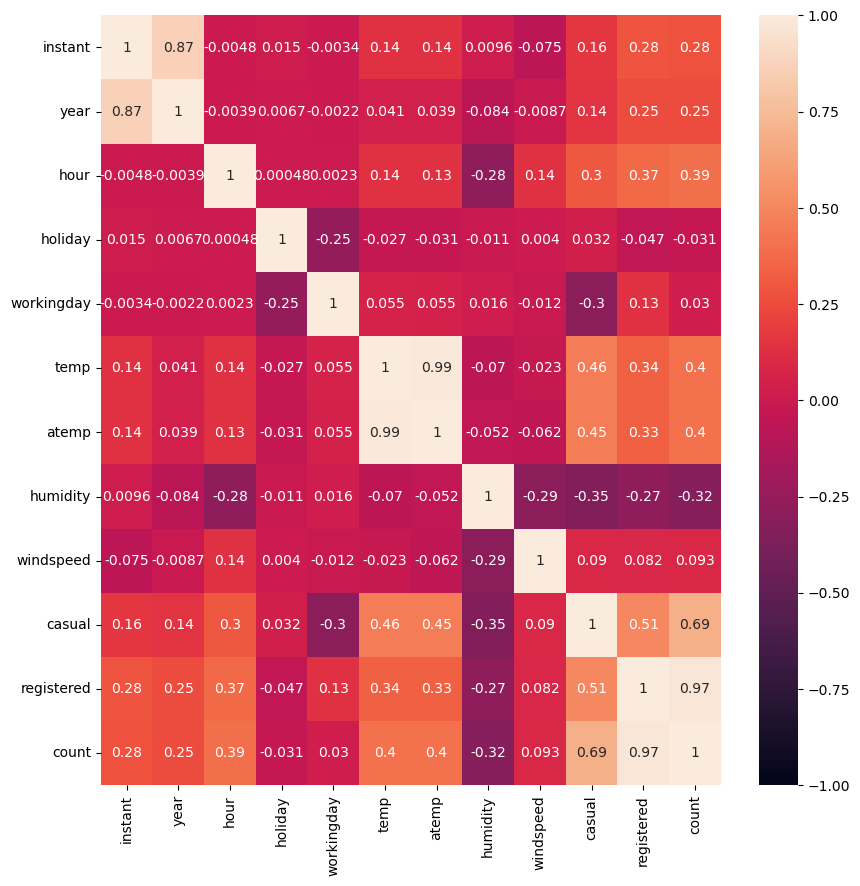

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(hour_df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

**Insight:**
- Based on season the highest bike sharing is fall season followed by summer season and winter session, then the lowest is spring session.
- Based on day the highest bike sharing is Friday and the lowest is Monday.
- Based on month the highest bike sharing is August and the lowest is January.
- In 2012 bike sharing more higher than 2011.
- If we saw based on registered or not, in 2011, there were 247252 casual (non-registered) cyclists and 995851 registered cyclists. In 2012, the number of casual users increased to 372765 and registered users also increased to 1676811.
- Based on hour the highest bike sharing is on 17 and the lowest is on 4.
- Based on correlation, we know that registered variable is the most high correlation with count (0.97).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Penyewaan Sepeda dalam setiap bulannya?

In [38]:
# monthly sharings 2011
hour_df_2011 = hour_df[hour_df['date'].dt.year == 2011]

monthly_sharings_2011 = hour_df_2011.resample(rule='M', on='date').agg({"count": "sum"})

monthly_sharings_2011 = monthly_sharings_2011.reset_index()
monthly_sharings_2011['month'] = monthly_sharings_2011['date'].dt.strftime('%B')

print(monthly_sharings_2011)

         date   count      month
0  2011-01-31   38189    January
1  2011-02-28   48215   February
2  2011-03-31   64045      March
3  2011-04-30   94870      April
4  2011-05-31  135821        May
5  2011-06-30  143512       June
6  2011-07-31  141341       July
7  2011-08-31  136691     August
8  2011-09-30  127418  September
9  2011-10-31  123511    October
10 2011-11-30  102167   November
11 2011-12-31   87323   December


C:\Users\melya\AppData\Local\Temp\ipykernel_21492\2666873413.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sharings_2011 = hour_df_2011.resample(rule='M', on='date').agg({"count": "sum"})


In [39]:
# monthly sharings 2012
hour_df_2012 = hour_df[hour_df['date'].dt.year == 2012]

monthly_sharings_2012 = hour_df_2012.resample(rule='M', on='date').agg({"count": "sum"})

monthly_sharings_2012 = monthly_sharings_2012.reset_index()
monthly_sharings_2012['month'] = monthly_sharings_2012['date'].dt.strftime('%B')

print(monthly_sharings_2012)

         date   count      month
0  2012-01-31   96744    January
1  2012-02-29  103137   February
2  2012-03-31  164875      March
3  2012-04-30  174224      April
4  2012-05-31  195865        May
5  2012-06-30  202830       June
6  2012-07-31  203607       July
7  2012-08-31  214503     August
8  2012-09-30  218573  September
9  2012-10-31  198841    October
10 2012-11-30  152664   November
11 2012-12-31  123713   December


C:\Users\melya\AppData\Local\Temp\ipykernel_21492\3196998057.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sharings_2012 = hour_df_2012.resample(rule='M', on='date').agg({"count": "sum"})


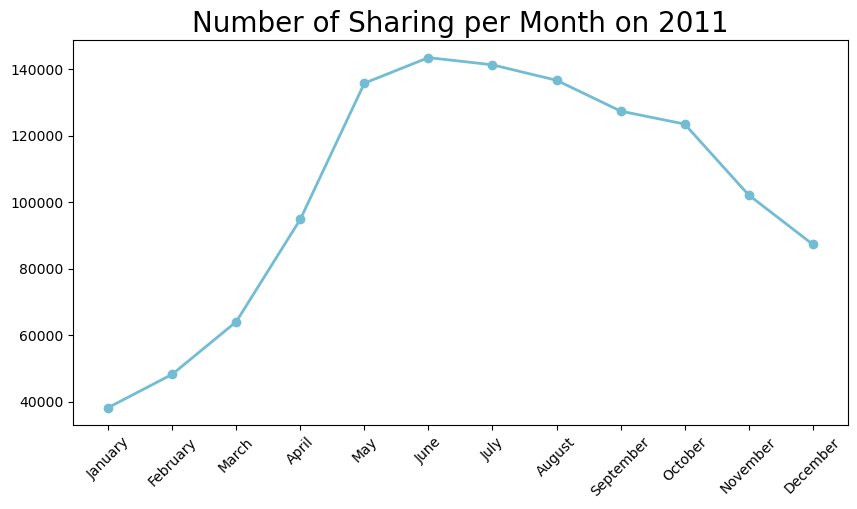

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_sharings_2011["month"],
    monthly_sharings_2011["count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Sharing per Month on 2011", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

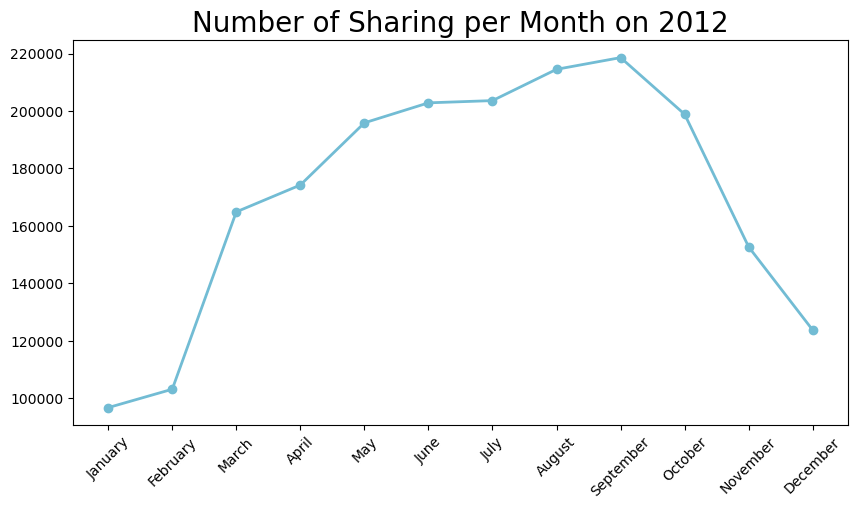

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_sharings_2012["month"],
    monthly_sharings_2012["count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Sharing per Month on 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

In [42]:
# combine 2011 and 2012
monthly_sharings_2011_2012 = pd.concat([monthly_sharings_2011, monthly_sharings_2012], ignore_index=True)

In [43]:
# extract year from date
monthly_sharings_2011_2012['year'] = monthly_sharings_2011_2012['date'].dt.year
monthly_sharings_2011_2012['month_year'] = monthly_sharings_2011_2012['month'] + ' ' + monthly_sharings_2011_2012['year'].astype(str)

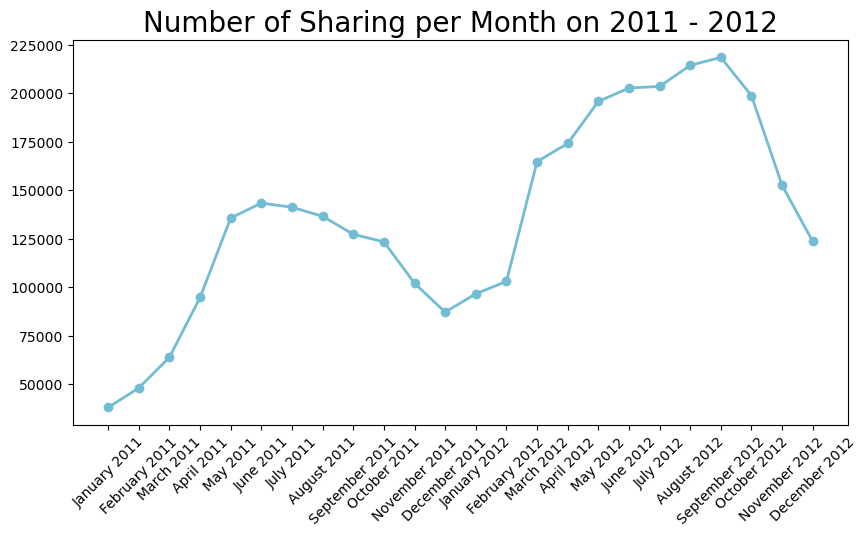

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_sharings_2011_2012["month_year"],
    monthly_sharings_2011_2012["count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Sharing per Month on 2011 - 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- In 2011, the number of sharings grows steadily from January to around May, reaching a peak before slightly declining for the rest of the year.
- In 2012, starting in March, the number of sharings increases sharply, surpassing the 2011 levels and continuing to grow untill the highest point is September 2012.

### Pertanyaan 2: Pada jam berapa paling banyak dan paling sedikit sepeda disewa?

In [45]:
sum_sharing_hour_df = hour_df.groupby("hour")['count'].sum().sort_values(ascending=False).reset_index()
sum_sharing_hour_df['hour'] = sum_sharing_hour_df['hour'].astype(str)
sum_sharing_hour_df

,hour,count
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


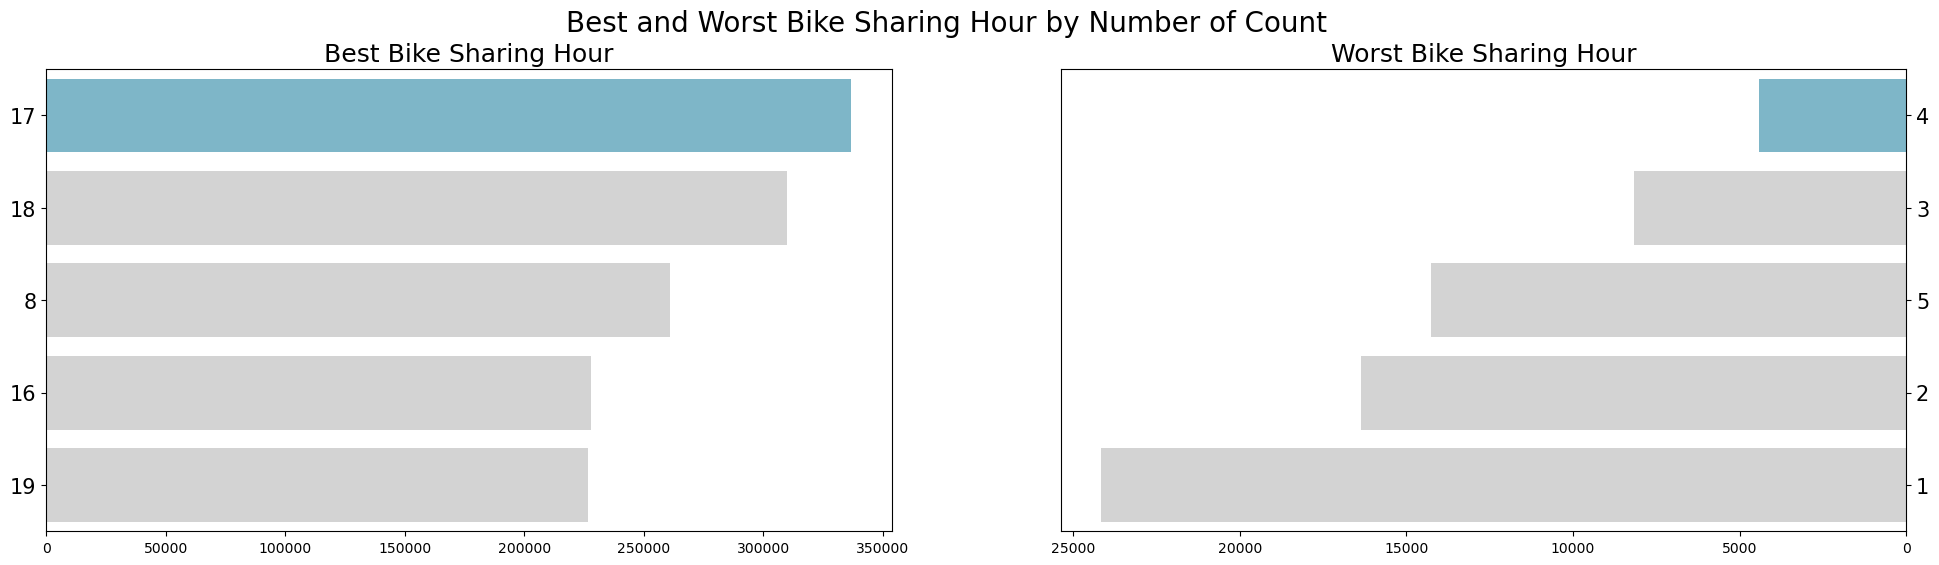

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="count", y="hour", data=sum_sharing_hour_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Bike Sharing Hour", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="count", y="hour", data=sum_sharing_hour_df.sort_values(by="count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Bike Sharing Hour", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Bike Sharing Hour by Number of Count", fontsize=20)
plt.show()

**Insight**
- Bar chart show 5 highest and 5 lower bike sharing hour.
- Based on hour, the most highest bikes shared at 17 followed by at 18, 8, 16, 19 and the lowest at 4 followed by 3, 5, 2, 1.

### Pertanyaan 3: Bagaimana perbandingan casual dan registered?

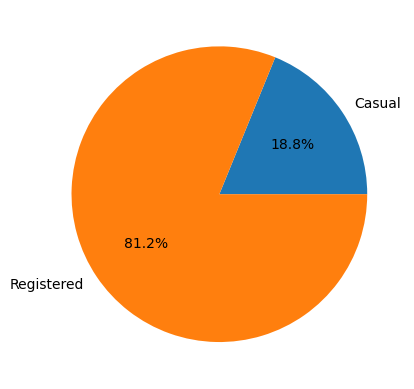

In [47]:
casual_count = sum(hour_df['casual'])

registered_count = sum(hour_df['registered'])

data = [casual_count, registered_count]
labels = ['Casual', 'Registered']

plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

**Insight**

Based on pie chart, 81.2% of people prefer registered over casual (just 18.8% people).

### Pertanyaan 4: Bagaimana hubungan temperature, feeling temperature, humidity, dan windspeed dengan penyewa sepeda?

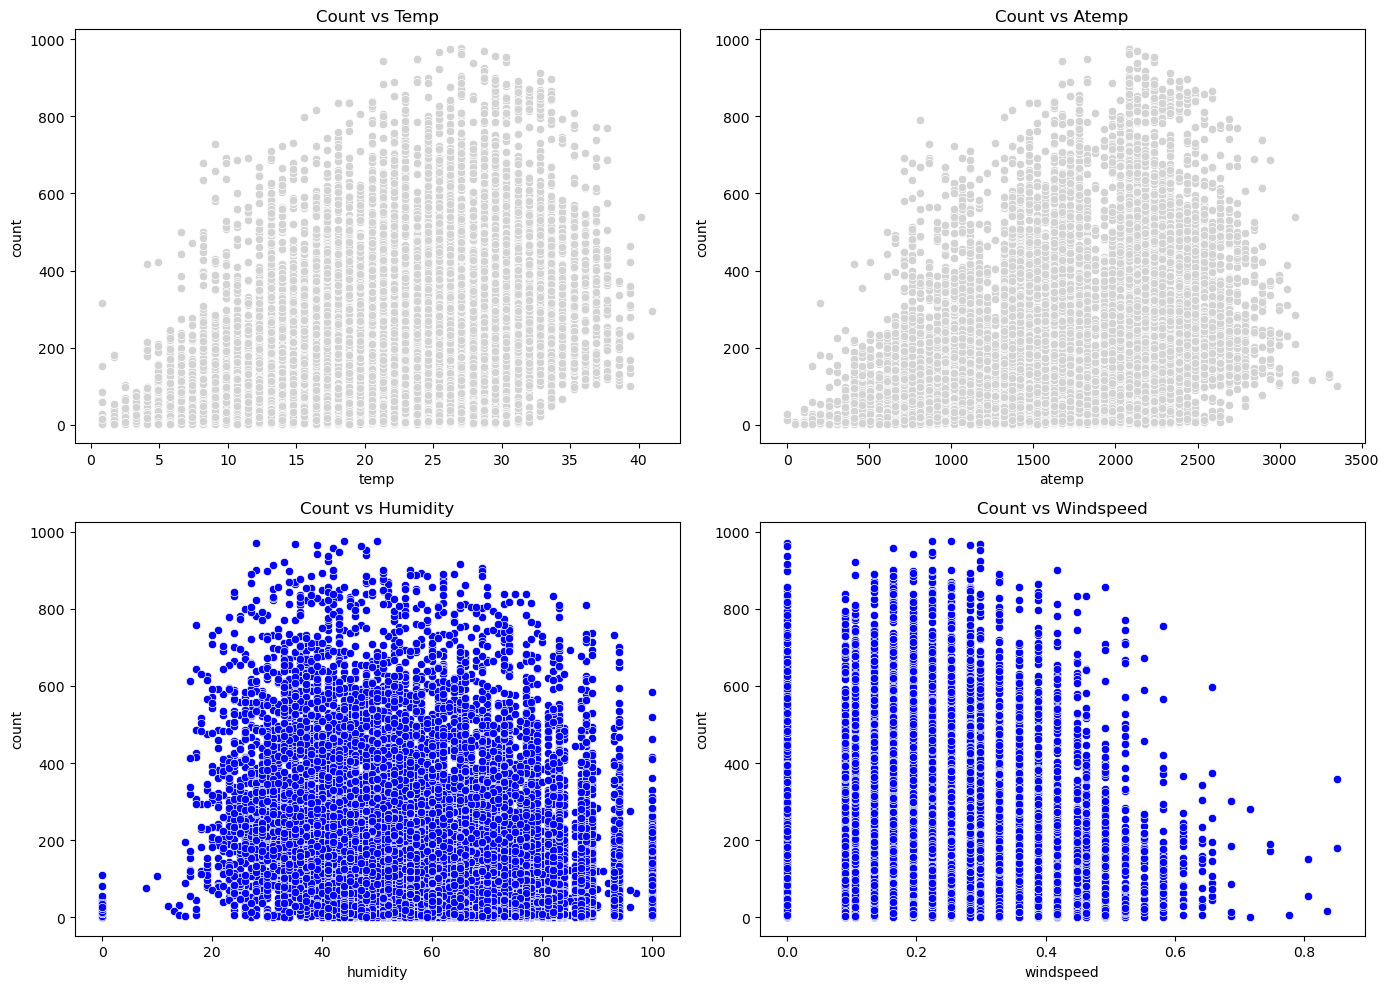

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.scatterplot(data=hour_df, y="count", x="temp", ax=axes[0, 0], facecolor="lightgrey")
axes[0, 0].set_title("Count vs Temp")

sns.scatterplot(data=hour_df, y="count", x="atemp", ax=axes[0, 1], facecolor="lightgrey")
axes[0, 1].set_title("Count vs Atemp")

sns.scatterplot(data=hour_df, y="count", x="humidity", ax=axes[1, 0], facecolor="blue")
axes[1, 0].set_title("Count vs Humidity")

sns.scatterplot(data=hour_df, y="count", x="windspeed", ax=axes[1, 1], facecolor="blue")
axes[1, 1].set_title("Count vs Windspeed")

plt.tight_layout()
plt.show()

**Inisght**

Based on the result of scatter plot:
- The most bicycles were shared when the `temp` ranged from 25 to 30 degrees. 
- The most bicycles shared when the `atemp` ranges from 2000 to 2500
- The most bikes shared when the `humidity` ranged from 20 to 40
- The most bicycles for rent when the `windspeed` is between 0 and 0.3. The higher the wind, the fewer bicycles were shared.

## Conclusion

Question:
- Pertanyaan 1: Bagaimana Performa Penyewaan Sepeda dalam setiap bulannya?
- Pertanyaan 2: Pada jam berapa paling banyak dan paling sedikit sepeda disewa?
- Pertanyaan 3: Bagaimana perbandingan casual dan registered?
- Pertanyaan 4: Bagaimana hubungan temperature, feeling temperature, humidity, dan windspeed dengan penyewa sepeda?

- Conclution pertanyaan 1: Fluctuated, but showed a pattern. At the beginning of the year it increased and at the end of the year it decreased.
- Conclution pertanyaan 2: Based on hour, the most highest bikes shared at 17 and the lowest at 4.
- Conclution pertanyaan 3: 81.2% of people prefer registered over casual (just 18.8% people).
- Conclution pertanyaan 4: Based on scatter plot, temperature, feeling temperature, humidity, and windspeed effect on bike shared.

## Analisis Lanjutan (Opsional)

### Analisis RFM

Based on registered.

In [49]:
rfm_df = hour_df.groupby(by="registered", as_index=False).agg({
    "date": "max", 
    "instant": "count",
    "count": "sum"
})
rfm_df.columns = ["registered", "max_share_timestamp", "frequency", "monetary"]
rfm_df.head()

,registered,max_share_timestamp,frequency,monetary
0,0,2012-11-23,24,35
1,1,2012-12-31,201,294
2,2,2012-12-30,245,648
3,3,2012-12-31,294,1154
4,4,2012-12-28,307,1602


In [50]:
# count when last bike shared (day)
rfm_df["max_share_timestamp"] = rfm_df["max_share_timestamp"].dt.date
recent_date = hour_df["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_share_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,registered,max_share_timestamp,frequency,monetary,recency
0,0,2012-11-23,24,35,38
1,1,2012-12-31,201,294,0
2,2,2012-12-30,245,648,1
3,3,2012-12-31,294,1154,0
4,4,2012-12-28,307,1602,3


In [51]:
rfm_df.drop("max_share_timestamp", axis=1, inplace=True)
rfm_df.head()

,registered,frequency,monetary,recency
0,0,24,35,38
1,1,201,294,0
2,2,245,648,1
3,3,294,1154,0
4,4,307,1602,3


In [52]:
rfm_df.describe()

,registered,frequency,monetary,recency
count,776.000000,776.000000,776.000000,776.000000
mean,393.960052,22.395619,4243.143041,70.113402
std,233.670785,33.043852,2951.279938,76.739038
min,0.000000,1.000000,35.000000,0.000000
25%,193.750000,3.000000,1731.500000,15.000000
50%,387.500000,9.000000,3371.000000,45.000000
75%,586.500000,36.000000,6358.750000,101.000000
max,886.000000,307.000000,12095.000000,594.000000


In [53]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,registered,frequency,monetary,recency
144,144,54,9763,0
112,112,60,8212,0
114,114,58,8506,0
246,246,25,7937,0
83,83,59,5857,0


In [54]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,registered,frequency,monetary,recency
4,4,307,1602,3
3,3,294,1154,0
5,5,287,1840,2
6,6,266,1992,6
2,2,245,648,1


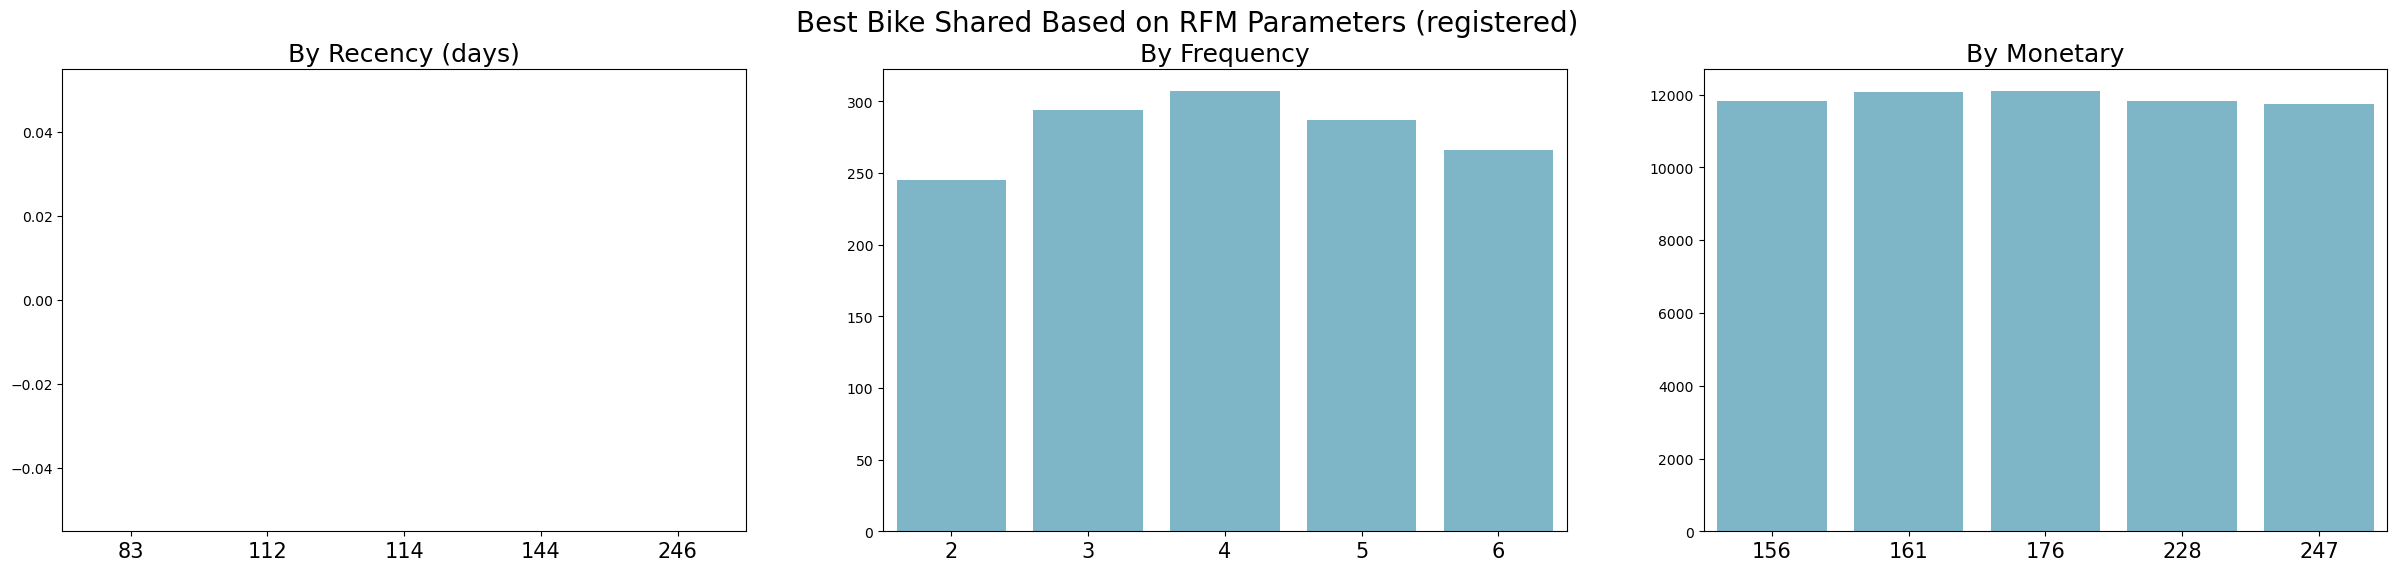

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="registered", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Bike Shared Based on RFM Parameters (registered)", fontsize=20)
plt.show()

#### Ranked based on RFM Score

In [56]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,registered,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0,24,35,38,413.5,521.0,1.0
1,1,201,294,0,765.0,771.0,2.0
2,2,245,648,1,743.5,772.0,18.0
3,3,294,1154,0,765.0,775.0,102.0
4,4,307,1602,3,707.0,776.0,168.0
